Import required Libraries 

In [1]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
from decision_tree_functions import *
from helper_functions import *

In [2]:
%matplotlib inline
sns.set_style("darkgrid")

Loading Iris DataSet

In [3]:
df = pd.read_csv("Iris.csv")
df = df.drop("Id", axis=1)
df = df.rename(columns={"species": "label"})

In [4]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


Splitting Data into Train and Test

In [5]:
random.seed(0)
train_data, test_data = train_test_split(df, test_size=20)

In [6]:
data = train_data.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

Note: Example Representation of Decision Tree:  
example_tree = {"petal_width <= 0.8": ["Iris-setosa",
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor",
                                                                                        "Iris-virginica"]},
                                                                "Iris-virginica"]}]}

Run the Decision Tree classifier on Training data

In [7]:
tree = decision_tree_algorithm(train_data, max_depth=3)
pprint(tree)

{'petal_width <= 0.6': ['Iris-setosa',
                        {'petal_width <= 1.6': [{'petal_length <= 4.9': ['Iris-versicolor',
                                                                         'Iris-virginica']},
                                                'Iris-virginica']}]}


Calculating the accuracy of the tree model

In [8]:
accuracy = calculate_accuracy(test_data, tree)
print ("Test accuracy for Iris data is: " + str(accuracy))

Test accuracy for Iris data is: 0.95


Loading and Preparing Titanic DataSet

In [9]:
df = pd.read_csv("Titanic.csv")
df["label"] = df.Survived
df = df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)

# handling missing values
median_age = df.Age.median()
mode_embarked = df.Embarked.mode()[0]

df = df.fillna({"Age": median_age, "Embarked": mode_embarked})

Training on Titanic Dataset, Testing Accuracy of the model

In [10]:
random.seed(0)
train_data, test_data = train_test_split(df, 0.2)
tree = decision_tree_algorithm(train_data, max_depth=10)
accuracy = calculate_accuracy(test_data, tree)
print ("Test accuracy for Titanic data is: " + str(accuracy))

Test accuracy for Titanic data is: 0.7808988764044944


In [11]:
print(tree['Sex = male'][0])

{'Fare <= 9.4833': [{'Age <= 32.0': [{'Age <= 30.5': [{'Fare <= 7.7958': [{'Fare <= 7.7417': [{'Fare <= 7.2292': [{'Age <= 27.0': [{'Age <= 25.0': [0, 1]}, 0]}, 0]}, {'Age <= 19.0': [0, {'Age <= 21.0': [1, 0]}]}]}, {'Age <= 20.0': [{'Fare <= 8.05': [{'Fare <= 7.8958': [0, {'Fare <= 7.925': [1, 0]}]}, 0]}, {'Fare <= 8.4583': [0, {'Fare <= 8.6625': [{'Age <= 26.0': [0, {'Age <= 27.0': [1, 0]}]}, 0]}]}]}]}, {'Fare <= 7.775': [0, {'Fare <= 7.8542': [1, {'Age <= 31.0': [1, 0]}]}]}]}, 0]}, {'Age <= 6.0': [{'Pclass = 3': [{'Fare <= 20.575': [1, {'Fare <= 31.275': [0, {'Fare <= 31.3875': [1, 0]}]}]}, 1]}, {'Pclass = 1': [{'Age <= 52.0': [{'Fare <= 30.5': [{'Fare <= 26.0': [0, {'Fare <= 29.7': [{'Fare <= 26.55': [1, 0]}, 1]}]}, {'Fare <= 227.525': [{'SibSp = 0': [{'Age <= 17.0': [1, 0]}, {'Fare <= 110.8833': [{'Fare <= 57.0': [1, 0]}, 1]}]}, 1]}]}, {'Age <= 71.0': [{'Embarked = S': [0, {'Age <= 56.0': [1, 0]}]}, 1]}]}, {'Age <= 34.0': [{'Fare <= 56.4958': [{'Fare <= 46.9': [{'Embarked = C': [{'

Looking at the root criterion and the left and right subtree

In [12]:
criterion = list(tree.keys())[0]
print(criterion)
# print(tree[criterion])
left_tree, right_tree = tree[criterion]
print(left_tree)
print(right_tree)

Sex = male
{'Fare <= 9.4833': [{'Age <= 32.0': [{'Age <= 30.5': [{'Fare <= 7.7958': [{'Fare <= 7.7417': [{'Fare <= 7.2292': [{'Age <= 27.0': [{'Age <= 25.0': [0, 1]}, 0]}, 0]}, {'Age <= 19.0': [0, {'Age <= 21.0': [1, 0]}]}]}, {'Age <= 20.0': [{'Fare <= 8.05': [{'Fare <= 7.8958': [0, {'Fare <= 7.925': [1, 0]}]}, 0]}, {'Fare <= 8.4583': [0, {'Fare <= 8.6625': [{'Age <= 26.0': [0, {'Age <= 27.0': [1, 0]}]}, 0]}]}]}]}, {'Fare <= 7.775': [0, {'Fare <= 7.8542': [1, {'Age <= 31.0': [1, 0]}]}]}]}, 0]}, {'Age <= 6.0': [{'Pclass = 3': [{'Fare <= 20.575': [1, {'Fare <= 31.275': [0, {'Fare <= 31.3875': [1, 0]}]}]}, 1]}, {'Pclass = 1': [{'Age <= 52.0': [{'Fare <= 30.5': [{'Fare <= 26.0': [0, {'Fare <= 29.7': [{'Fare <= 26.55': [1, 0]}, 1]}]}, {'Fare <= 227.525': [{'SibSp = 0': [{'Age <= 17.0': [1, 0]}, {'Fare <= 110.8833': [{'Fare <= 57.0': [1, 0]}, 1]}]}, 1]}]}, {'Age <= 71.0': [{'Embarked = S': [0, {'Age <= 56.0': [1, 0]}]}, 1]}]}, {'Age <= 34.0': [{'Fare <= 56.4958': [{'Fare <= 46.9': [{'Embarke

In [13]:
'''
This function split the "data" into two parts according to the "criterion",
where "criterion" consists of feature_name, comparison_operator, and the value for splitting,
and "data" is a dataframe object that contains all the data points at this given node of the tree.
'''
def split_data(data, criterion):
    feature, comparison_operator, value = criterion.split()

    # continuous feature
    if comparison_operator == "<=":
        left_data = data[data[feature] <= float(value)]
        right_data = data[data[feature] >  float(value)]

    # categorical feature
    else:
        left_data = data[data[feature].astype(str) == value]
        right_data  = data[data[feature].astype(str) != value]

    # Return the two partitions of the data after splitting
    return left_data, right_data

In [14]:
'''
This function returns the majority label value of data (if classification) or mean label value of data (if regression)
'''
def get_majority_or_mean_label(data, ml_task="classification"):
    # If task is regression, return the mean value of all the labels
    if ml_task == "regression":
        return data.label.mean()

    # If classification, return the majority class label
    else:
        return data.label.value_counts().index[0]

In [15]:
'''
This function takes data and a tree object (string if the tree is leaf, or dict object if it is not leaf),
makes prediction on the data using the given tree and calculates the error
Input:
    node: a dataframe object that include all the data points in that given node of the tree
    tree: a string/float value (if the tree is a leaf) or a dictionary object(if it is not a leaf) built recursively
         in the following format {criterion : [left_subTree, right_subTree]}, where left_subTree and
         right_subTree can be either a string/float (if it is leaf) or a dictionary (if it is not a leaf).
         To see an example of what the tree object looks like, take a look at the output of one of the cells above.
'''
def calculate_error(data, tree, ml_task="classification"):
    prediction_labels = make_predictions(data, tree)
    actual_labels = data.label

    if ml_task == "regression":
        # mean squared error
        return ((prediction_labels - actual_labels) **2).mean()
    else:
        # number of errors
        return sum(prediction_labels != actual_labels)

In [16]:
'''
This is a helper function that may be invoked in the prune_algorithm() to decide whether to prune the tree or not.
This function takes a tree object, training_data, validation_data as the input.
The intuition behind this function is that it checks whether predicting with the given tree produces a better outcome than simply
getting the majority/mean label from the training data. The way we check this is to use a validation dataset. We first
compute the error of making prediction on the validation data using just the majority/mean label of the training data.
We then compute the error of making prediction on the validation data using the tree. If the former is better
than the latter, we discard the tree and simply return the majority class label (i.e. we prune the tree). Otherwise,
we keep the original tree and return it.
'''
def prune_tree_helper(tree, data_train, data_val, ml_task="classification"):

    majority_label = get_majority_or_mean_label(data_train, ml_task)
    errors_using_majority_label = calculate_error(data_val, majority_label, ml_task)

    errors_using_tree = calculate_error(data_val, tree, ml_task)

    if errors_using_majority_label <= errors_using_tree:
        return majority_label
    else:
        return tree

In [17]:
'''
This function takes a given tree, training data, and validation data, and prune the tree based on the
prediction performance on the validation data at each node of the tree. This function will be implemented
recursively.
Input:
    cur_tree: a dict object (if the tree is not a leaf), or a string/float value (if the tree is a leaf)
    data_train: a dataframe object represents the training data at this given node of the tree
    data_val: a dataframe object represents the validation data at this given node of the tree
    ml_task: a string that is either "regression" or "classification"
Return:
    a tree that is pruned (a string/float value if the tree is a single leaf, or a dict object if
    the tree has branches)
'''

def prune_algorithm(cur_tree, data_train, data_val, ml_task="classification"):

    if not isinstance(cur_tree, dict):
        ################################################################
        # Base case: if tree is a single leaf, just return the tree
        ################################################################
        return cur_tree


    else:
        criterion = list(cur_tree.keys())[0]
        left_tree, right_tree = cur_tree[criterion]
        left_data_train,right_data_train = split_data(data_train,criterion)
        left_data_val,right_data_val=split_data(data_val,criterion)
        pruned_left_tree= prune_algorithm(left_tree,left_data_train,left_data_val,ml_task)
        pruned_right_tree= prune_algorithm(right_tree,right_data_train,right_data_val,ml_task)
        cur_tree = {criterion: [pruned_left_tree, pruned_right_tree]}
        result = prune_tree_helper(cur_tree,data_train,data_val,ml_task)
        if not isinstance(result, dict):
          cur_tree = result
        return cur_tree

        ################################################################
        # Recursive case: if tree has branches, do the following steps
        # 1. split data_train into two parts "data_train_left" and "data_train_right" based on the "criterion"
        #    (hint: use split_data method)
        # 2. split data_val into two parts "data_val_left" and "data_val_right" based on the "criterion"
        #    (hint: use split_data method)
        # 3. recursively call prune_algorithm on left_tree, data_train_left, data_val_left to get the pruned left tree
        # 4. recursively call prune_algorithm on right_tree, data_train_right, data_val_right to get the pruned right tree
        # 5. Update the cur_tree as cur_tree = {criterion: [pruned_left_tree, pruned_right_tree]}
        # 6. Prune the cur_tree that is updated in step 5 and return the pruned tree (if the tree doesn't need to be
        #    pruned, just return cur_tree.
        ################################################################


In [18]:
'''
run the following cells to compare the test
accuracy of pre-pruned tree and post-pruned tree on TiTanic Dataset
'''
# Load Titanic Data

df = pd.read_csv("Titanic.csv")
df["label"] = df.Survived
df = df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)

# handling missing values
median_age = df.Age.median()
mode_embarked = df.Embarked.mode()[0]

df = df.fillna({"Age": median_age, "Embarked": mode_embarked})

Compare test accuracy of Decision Tree before and after pruning

In [19]:
random.seed(1)
metrics = {"max_depth": [], "acc_tree": [], "acc_tree_pruned": []}
for n in range(10, 26):
    df_train, df_test = train_test_split(df, test_size=0.15)
    df_train, df_val = train_test_split(df_train, test_size=0.15)

    tree = decision_tree_algorithm(df_train, ml_task="classification", max_depth=n)
    tree_pruned = prune_algorithm(tree, df_train, df_val, ml_task="classification")

    metrics["max_depth"].append(n)
    metrics["acc_tree"].append(calculate_accuracy(df_test, tree))
    metrics["acc_tree_pruned"].append(calculate_accuracy(df_test, tree_pruned))

df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.set_index("max_depth")

<Axes: xlabel='max_depth'>

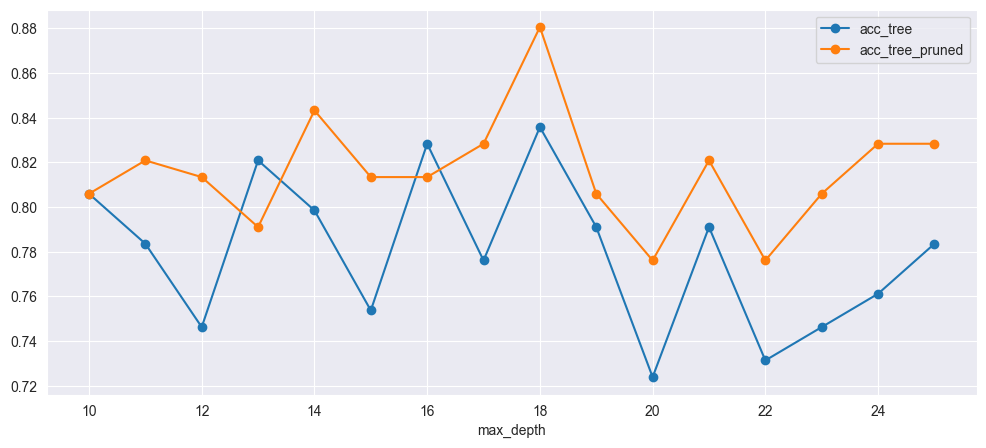

In [20]:
# Plot
df_metrics.plot(figsize=(12, 5), marker="o")